### Ejercicio 9 Matriz de confusión

El dataset Moons es un conjunto de datos sintéticos que se utiliza a menudo para probar algoritmos de clasificación, especialmente aquellos que necesitan manejar fronteras no lineales. Se genera mediante la función make_moons de scikit-learn. 

El dataset tiene las siguientes características:

El dataset contiene dos clases que están distribuidas en una forma de "lunas" (o "moons") entrelazadas, lo que crea una distribución no lineal.

La primera clase está formada por los puntos en una luna (curva convexa).

La segunda clase está formada por los puntos en la otra luna.

Cada muestra tiene dos atributos que se distribuyen de manera que las clases no son linealmente separables.

El parámetro noise controla el desplazamiento aleatorio de los puntos generados en el dataset. Un valor más alto de noise significa que los puntos generados estarán más dispersos y menos alineados con las "formas ideales" de las lunas (las dos clases del dataset). A medida que se aumenta el valor de noise, los puntos de datos se alejan más de sus posiciones ideales, lo que hace más difícil para el clasificador encontrar una frontera de decisión clara.

Se prueban varios valores de K y se genera en cada caso la matriz de confusión correspondiente. De esta forma, podemos conpararlas para ayudar a elegir el valor de k.



Tamaño del conjunto de validación: 100


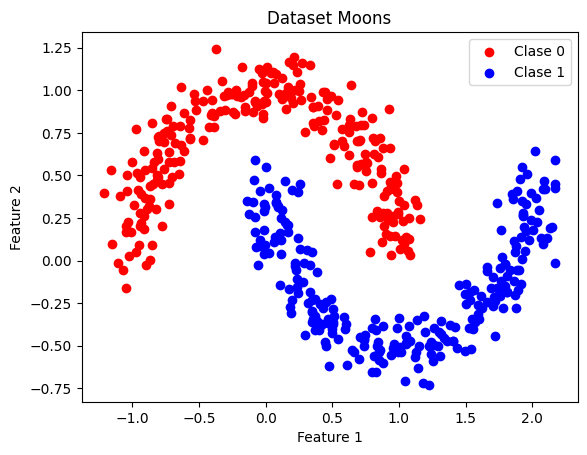

k=  1  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  3  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  5  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  7  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  9  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  11  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  13  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  15  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensibilidad (recall):  1.0
f1-score:  1.0
 
k=  17  Tasa de acierto en dataset de validación:  1.0
precisión:  1.0
sensib

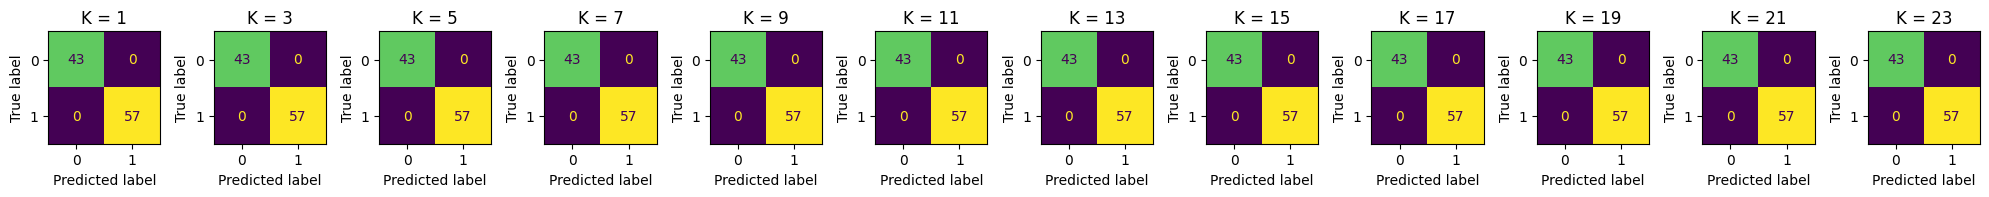

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Generar el dataset Moons con 500 registros
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de validación:", X_test.shape[0])

# Visualizar el dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset Moons')
plt.show()


# Probar diferentes valores de K
k_values = [1, 3, 5, 7,9,11,13,15,17,19,21,23]
fig, axes = plt.subplots(1, len(k_values), figsize=(20, 5))

for i, k in enumerate(k_values):
    # Crear y entrenar el clasificador k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predicción en el conjunto de prueba
    y_pred = knn.predict(X_test)
    
    # Calcular la matriz de confusión
    #cm = confusion_matrix(y_test, y_pred,normalize='all')
    cm = confusion_matrix(y_test, y_pred)
    
    # Obtencion de métricas
    acc_rate = accuracy_score(y_test, y_pred)
    print("k= ",k," Tasa de acierto en dataset de validación: ", acc_rate)
    print("precisión: ", precision_score(y_test, y_pred))
    print("sensibilidad (recall): ", recall_score(y_test, y_pred))
    print("f1-score: ", f1_score(y_test, y_pred))
    print(" ")
    
    # Mostrar la matriz de confusión
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    disp.plot(ax=axes[i], colorbar=False)
    axes[i].set_title(f"K = {k}")

plt.tight_layout()
plt.show()

Ejercicio: Ejecutar el programa para valores de noise: 0.1, 0.2, 0.3 y 0.4. ¿Que ocurre con la nube de puntos y 
con las matrices de confusión?

Ejercicio: Sustituir la instrucción "cm = confusion_matrix(y_test, y_pred, normalize='all')" por "cm = confusion_matrix(y_test, y_pred). ¿Cuál es la diferencia en las matrices de confusión?